In [1]:
def MSE(y,y_pred):
    
    return (y-y_pred).pow(2).mean()

In [2]:
import numpy as np
import torch
import matplotlib.pyplot as plt
from torch.autograd import Variable
from torch import matmul as mm

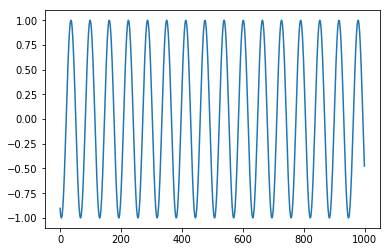

In [45]:
N = 1000
series = np.sin(0.1*np.arange(N) + np.random.randn())
plt.plot(series)

In [46]:
T = 10
M = 4
D = 1
K = 1


X = []
Y = []

for i in range(N - T):
    X.append(series[i:i+T])
    Y.append(series[i+T])
    
X = np.array(X).astype(np.float32)
X = torch.from_numpy(X)
Y = np.array(Y).astype(np.float32)
Y = torch.from_numpy(Y)

Nx = X.shape[0]

In [47]:
##Forward pas
Wxh = Variable(torch.randn(D,M), requires_grad = True)
Whh = Variable(torch.randn(M,M), requires_grad = True)
Who = Variable(torch.randn(M,K), requires_grad = True)

h0 = Variable(torch.zeros(M), requires_grad = True)
bh = Variable(torch.randn(M), requires_grad = True)
bo = Variable(torch.randn(K), requires_grad = True)

X = X.reshape(Nx, T,D)



In [48]:
np.random.randint(0, Nx)

324

In [49]:
epochs = 600
losses =[]
learning_rate = 1e-3
ht_1 = h0
for i in range(epochs):
        ys = []
        index = np.random.randint(0, Nx)
        teste = X[index]        
        
        for t in range(T):

            h_t = torch.relu(mm(teste[t], Wxh) + mm(ht_1,Whh) + bh)
            y_t = mm(h_t, Who) + bo
            ys.append(y_t)
            h_t1 = h_t

        pred = ys[-1]

        erro = MSE(Y[index], pred)
        erro.backward()
        losses.append(erro.data)
        
        gradWxh = Wxh.grad.data
        gradWhh = Whh.grad.data
        gradWho = Who.grad.data
        gradh0 =  h0.grad.data
        gradbh =  bh.grad.data
        gradbo = bo.grad.data

        Wxh.data = Wxh.data - learning_rate * gradWxh
        Whh.data = Whh.data - learning_rate * gradWhh
        Who.data = Who.data - learning_rate * gradWho
        h0.data = h0.data - learning_rate * gradh0
        gradbh.data = gradbh.data - learning_rate * gradbh
        gradbo.data = gradbo.data - learning_rate * gradbo
        
        Wxh.grad.data.zero_()
        Whh.grad.data.zero_()
        Who.grad.data.zero_()
        h0.grad.data.zero_()
        bo.grad.data.zero_()
        bh.grad.data.zero_()
        


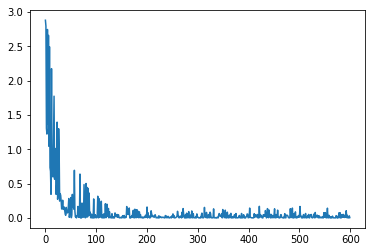

In [50]:
plt.plot(losses)